# Análise de performace por loja!

### Importação dos dados



In [48]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [42]:
# Faturamento da loja 1
print(f"Faturamento da loja 1: R$ {loja['Preço'].sum():_.2f}".replace('.', ',').replace('_', '.'))

# Faturamento da loja 2
print(f"Faturamento da loja 2: R$ {loja2['Preço'].sum():_.2f}".replace('.', ',').replace('_', '.'))

# Faturamento da loja 3
print(f"Faturamento da loja 3: R$ {loja3['Preço'].sum():_.2f}".replace('.', ',').replace('_', '.'))

# Faturamento da loja 4
print(f"Faturamento da loja 4: R$ {loja4['Preço'].sum():_.2f}".replace('.', ',').replace('_', '.'))

Faturamento da loja 1: R$ 1.534.509,12
Faturamento da loja 2: R$ 1.488.459,06
Faturamento da loja 3: R$ 1.464.025,03
Faturamento da loja 4: R$ 1.384.497,58


# 2. Vendas por Categoria


In [43]:
lojas = [loja, loja2, loja3, loja4]  # Lista de DataFrames das lojas

for i, loja_atual in enumerate(lojas, 1):  # Iterar pelas lojas com índice (i)
    print(f"Loja {i}:")  # Imprimir o número da loja
    categorias_unicas = loja_atual['Categoria do Produto'].unique()  # Obter categorias únicas da loja atual

    for categoria in categorias_unicas:  # Iterar pelas categorias da loja atual
        quantidade_vendas = loja_atual['Categoria do Produto'].value_counts()[categoria]  # Contar vendas da categoria
        print(f"  Categoria: {categoria}, Quantidade de vendas: {quantidade_vendas}")  # Imprimir resultado

    print(f"Número de vendas: {loja_atual.shape[0]}")  # Adicionar linha com o número total de vendas
    print("-" * 20)  # Separador entre as lojas

Loja 1:
  Categoria: eletronicos, Quantidade de vendas: 448
  Categoria: moveis, Quantidade de vendas: 465
  Categoria: brinquedos, Quantidade de vendas: 324
  Categoria: eletrodomesticos, Quantidade de vendas: 312
  Categoria: utilidades domesticas, Quantidade de vendas: 171
  Categoria: esporte e lazer, Quantidade de vendas: 284
  Categoria: livros, Quantidade de vendas: 173
  Categoria: instrumentos musicais, Quantidade de vendas: 182
Número de vendas: 2359
--------------------
Loja 2:
  Categoria: moveis, Quantidade de vendas: 442
  Categoria: instrumentos musicais, Quantidade de vendas: 224
  Categoria: esporte e lazer, Quantidade de vendas: 275
  Categoria: eletronicos, Quantidade de vendas: 422
  Categoria: utilidades domesticas, Quantidade de vendas: 181
  Categoria: brinquedos, Quantidade de vendas: 313
  Categoria: eletrodomesticos, Quantidade de vendas: 305
  Categoria: livros, Quantidade de vendas: 197
Número de vendas: 2359
--------------------
Loja 3:
  Categoria: eletrod

# 3. Média de Avaliação das Lojas

In [44]:
lojas = [loja, loja2, loja3, loja4]  # Lista de DataFrames das lojas
# Prefiro usar o For para obter o resultado em linha por linha
for i, loja_atual in enumerate(lojas, 1):  # Iterar pelas lojas com índice (i)
    media_avaliacoes = loja_atual['Avaliação da compra'].mean()  # Calcular a média das avaliações
    print(f"Loja {i}: Média das avaliações de compra: {media_avaliacoes:.2f}")  # Imprimir a média

Loja 1: Média das avaliações de compra: 3.98
Loja 2: Média das avaliações de compra: 4.04
Loja 3: Média das avaliações de compra: 4.05
Loja 4: Média das avaliações de compra: 4.00


# 4. Produtos Mais e Menos Vendidos

In [45]:
lojas = [loja, loja2, loja3, loja4]  # Lista de DataFrames das lojas

for i, loja_atual in enumerate(lojas, 1):  # Iterar pelas lojas com índice (i)
    print(f"Loja {i}:")  # Imprimir o número da loja

    # Produtos mais vendidos
    produtos_mais_vendidos = loja_atual['Produto'].value_counts().head(3)  # Top 5 produtos mais vendidos
    print("Produtos mais vendidos:")
    for produto, quantidade in produtos_mais_vendidos.items():
        print(f"  {produto}: {quantidade} vendas")

    # Produtos menos vendidos
    produtos_menos_vendidos = loja_atual['Produto'].value_counts().tail(3)  # Top 5 produtos menos vendidos
    print("\nProdutos menos vendidos:")
    for produto, quantidade in produtos_menos_vendidos.items():
        print(f"  {produto}: {quantidade} vendas")

    print("-" * 20)  # Separador entre as lojas

Loja 1:
Produtos mais vendidos:
  Micro-ondas: 60 vendas
  TV Led UHD 4K: 60 vendas
  Guarda roupas: 60 vendas

Produtos menos vendidos:
  Panela de pressão: 35 vendas
  Headset: 33 vendas
  Celular ABXY: 33 vendas
--------------------
Loja 2:
Produtos mais vendidos:
  Iniciando em programação: 65 vendas
  Micro-ondas: 62 vendas
  Bateria: 61 vendas

Produtos menos vendidos:
  Mesa de jantar: 34 vendas
  Impressora: 34 vendas
  Jogo de tabuleiro: 32 vendas
--------------------
Loja 3:
Produtos mais vendidos:
  Kit banquetas: 57 vendas
  Mesa de jantar: 56 vendas
  Cama king: 56 vendas

Produtos menos vendidos:
  Mochila: 36 vendas
  Micro-ondas: 36 vendas
  Blocos de montar: 35 vendas
--------------------
Loja 4:
Produtos mais vendidos:
  Cama box: 62 vendas
  Faqueiro: 59 vendas
  Dashboards com Power BI: 56 vendas

Produtos menos vendidos:
  Violão: 37 vendas
  Guarda roupas: 34 vendas
  Guitarra: 33 vendas
--------------------


# 5. Frete Médio por Loja


In [46]:
# Calculando o frete médio por loja
lojas = [loja, loja2, loja3, loja4]

for i, loja_atual in enumerate(lojas, 1):
    frete_medio = loja_atual['Frete'].mean()
    print(f"Loja {i}: Frete médio: R$ {frete_medio:.2f}")


Loja 1: Frete médio: R$ 34.69
Loja 2: Frete médio: R$ 33.62
Loja 3: Frete médio: R$ 33.07
Loja 4: Frete médio: R$ 31.28


# 6. Gráficos

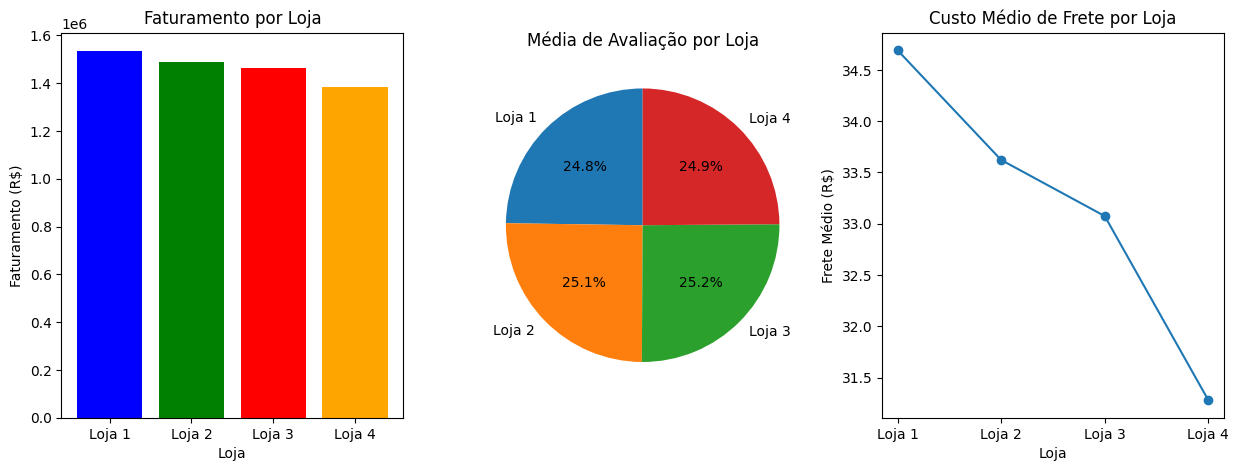

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico de barras do faturamento
faturamentos = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Dados para o gráfico de pizza da média de avaliação
medias_avaliacoes = [loja['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(),
                     loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]

# Dados para o gráfico de barras agrupadas das vendas por categoria
todas_categorias = set()
for loja_atual in lojas:
    todas_categorias.update(loja_atual['Categoria do Produto'].unique())
todas_categorias = sorted(list(todas_categorias))

vendas_por_categoria = []
for loja_atual in lojas:
    vendas_categoria_loja = []
    for categoria in todas_categorias:
        vendas_categoria_loja.append(len(loja_atual[loja_atual['Categoria do Produto'] == categoria]))
    vendas_por_categoria.append(vendas_categoria_loja)

x = np.arange(len(todas_categorias))
width = 0.2

# Criar a figura e os subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas

# Gráfico de barras do faturamento
ax1.bar(lojas_nomes, faturamentos, color=['blue', 'green', 'red', 'orange'])
ax1.set_title('Faturamento por Loja')
ax1.set_xlabel('Loja')
ax1.set_ylabel('Faturamento (R$)')

# Gráfico de pizza da média de avaliação
ax2.pie(medias_avaliacoes, labels=lojas_nomes, autopct='%1.1f%%', startangle=90)
ax2.set_title('Média de Avaliação por Loja')

# Calculando o frete médio por loja
lojas = [loja, loja2, loja3, loja4]
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_medios = [loja_atual['Frete'].mean() for loja_atual in lojas]

# Criando o gráfico de linha
plt.plot(lojas_nomes, fretes_medios, marker='o', linestyle='-')  # marker='o' adiciona marcadores aos pontos
plt.title('Custo Médio de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.show()

# Ajustar o layout e exibir os gráficos
fig.tight_layout()
plt.show()

# 7 Relatório Final

Após analisar seis indicadores de desempenho das lojas, com foco em três aspectos quantitativos principais, concluí que a filial recomendada para venda é a Número 4. Apesar de apresentar o menor custo médio de frete, sua média de avaliação é a terceira mais baixa e seu faturamento é o menor entre todas as filiais.